In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from scipy import special, stats, optimize, integrate

from mpmath import *

from code.python.mpmath_integration import quad_phi

In [1374]:
alpha = 10.005
beta = 0.0025
mu = 0.25
delta = 0.1
x = -0.5

x = -1200
alpha = 1
beta = -1/2
mu = 1
delta = 10

gamma = np.sqrt(alpha**2 - beta**2)

x -mu, gamma * delta

(-1201, 8.660254037844386)

#### 1. Estimate truncation N

In [1375]:
def truncation(alpha, beta, mu, delta, eps):
    gamma = np.sqrt(alpha**2 - beta**2)
    C = delta * np.exp(delta * gamma) / np.sqrt(2 * np.pi)
    u = (gamma ** 2 * eps / (2 * C)) ** (2/3)
    print(u)

    t1 = 2 * np.log(gamma)
    t2 = np.log(3) + 2/3 * (2 * np.log(gamma) + np.log(eps) - np.log(2) - np.log(delta / np.sqrt(2 * np.pi)) - delta * gamma)

    if (t1 - t2) > 705.342:
        return 1
    
    y = np.exp(t1 - t2)

    # Lambert W0
    lw = float(special.lambertw(y))
    print(lw)

    # Approximation
    la = np.log(y) ** (np.log(y) / (1 + np.log(y)))
    print(la)
    
    return int(np.ceil((3 / gamma ** 2 * lw)))

In [1376]:
eps = 1.1e-16

N = truncation(alpha, beta, mu, delta, eps)
N

1.4755102508532733e-14
27.15917803945455
27.326319448508762


/tmp/ipykernel_3680/3871865590.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  lw = float(special.lambertw(y))


109

In [1377]:
stats.norminvgauss.cdf(x=x, a=alpha*delta, b=beta*delta, loc=mu, scale=delta)

1.701651201267684e-261

In [1378]:
quad_phi(x, alpha, beta, mu, delta, a=mp.zero, b=inf, digits=300)

mpf('7.5808798835096288e-303')

In [1380]:
quad_phi(x, alpha, beta, mu, delta, a=mp.zero, b=1698, digits=300)

mpf('1.7016511983062506e-261')

#### 2. Tanh-sinh integration

In [1186]:
from tanh_sinh import integrate as tanh_sinh_integrate

In [1247]:
def f(t):
    gamma = np.sqrt(alpha**2 - beta**2)
    integrand = special.ndtr((x-(mu + beta * t))/np.sqrt(t)) * np.exp(-delta**2/(2*t) - gamma**2/2*t) * t**(-3/2)
    C = delta * np.exp(delta * gamma) / np.sqrt(2 * np.pi)

    return C * integrand

In [1256]:
val, error_estimate = tanh_sinh_integrate(f, 0, N, eps=1e-20, mode='numpy')

level: 0. j: 1
[1.927915110348427e-12] 1
level: 1. j: 1
[1.927915110348427e-12, 9.639575551742141e-13] 1
level: 2. j: 3
[1.927915110348427e-12, 9.639575551742141e-13, 8.768039129010351e-08] 8.76803913000491e-8
level: 3. j: 7
[1.927915110348427e-12, 9.639575551742141e-13, 8.768039129010351e-08, 5.202795427025769e-06] 5.02879381513671e-6
level: 4. j: 15
[1.927915110348427e-12, 9.639575551742141e-13, 8.768039129010351e-08, 5.202795427025769e-06, 2.6779860973658194e-05] 1.73673798090864e-5
level: 5. j: 31
[1.927915110348427e-12, 9.639575551742141e-13, 8.768039129010351e-08, 5.202795427025769e-06, 2.6779860973658194e-05, 2.389020337563756e-05] 3.24449459230379e-7
level: 6. j: 63
[1.927915110348427e-12, 9.639575551742141e-13, 8.768039129010351e-08, 5.202795427025769e-06, 2.6779860973658194e-05, 2.389020337563756e-05, 2.3893025531853744e-05] 6.38838638733742e-14
level: 7. j: 126
[1.927915110348427e-12, 9.639575551742141e-13, 8.768039129010351e-08, 5.202795427025769e-06, 2.6779860973658194e-05

In [1257]:
val, error_estimate

(2.389302554298392e-05, mpf('1.6846339447612166e-23'))

##### 2.1. Order of magnitude

In [1258]:
xx = np.linspace(1e-15, N, 100000)
f = special.ndtr((x-(mu + beta*xx))/np.sqrt(xx)) * np.exp(-delta**2/(2*xx) - gamma**2/2*xx) * xx**(-3/2)

xx[np.argmax(f)]

0.065620656206563

In [1259]:
t = 1
z = (x-(mu + beta * t))/np.sqrt(t)
stats.norm.pdf(z) / special.ndtr(z), np.sqrt(2 / np.pi) - 2 / np.pi * z, z

(1.3307010655664757, 1.2769409395094704, -0.7525)

In [1260]:
def fa(t):
    z = (x-(mu + beta * 1))/np.sqrt(1)
    T = np.sqrt(2 / np.pi) - 2 / np.pi * z
    return delta ** 2 / (2*t**2) - 3/(2*t) -1/2*(alpha ** 2 + (x-mu)** 2 - 2 * beta ** 2)

sol = optimize.root_scalar(fa, method='bisect', bracket=[1e-6, 20], xtol=1e-4)
sol

      converged: True
           flag: converged
 function_calls: 20
     iterations: 18
           root: 0.0029764637184143067

In [1261]:
(alpha ** 2  - 2 * beta ** 2)

100.10001250000002

In [1194]:
(-3/2 + np.sqrt(9/4 + (delta ** 2) * (alpha ** 2 + (x-mu)** 2 - 2 * beta ** 2))) / (alpha ** 2 + (x-mu)** 2 - 2 * beta ** 2)

1.0713680533848702

In [1155]:
t0 = (-3/2 + np.sqrt(9/4 + (delta**2 + (x-mu)**2) * alpha ** 2)) / alpha**2
t0

2.025910984031452

Simple

In [1156]:
t0 = delta / alpha
t0

1.8163265306122447

Estimate $\gamma$ and $\delta$ both large, and $\beta$ and $x-\mu$ fixed.

In [1157]:
gamma, delta

(22.05, 40.05)

In [1158]:
t0 = -3/2 + np.sqrt(9/4 + (gamma * delta) ** 2) / gamma ** 2
t0

0.3163291507486856

Case $x - \mu < 0$ and $\beta \to 0$

In [392]:
omega = np.sqrt((x-mu)**2 + delta ** 2)
t0 = -3/2 + np.sqrt(9/4 + (gamma * omega) ** 2) / gamma ** 2
t0

1.2599413388315006

Case $x - \mu < 0$ and $\beta < 0$

In [393]:
x-mu, beta

(0.76, 0.1)

In [394]:
h = (beta * (x-mu) - 3) / 2
t0 = (h + np.sqrt(h ** 2 + (delta * omega) ** 2)) / gamma ** 2
t0

0.0008507418599128869

In [1224]:
def g(t):
    z = (x-mu)/np.sqrt(t) - beta*np.sqrt(t)
    t1 = -0.5 * (delta ** 2 / t + gamma**2*t)
    t2 = - 3/2*np.log(t)
    t3 = np.log(special.ndtr(z))
    print(z, t1, t2, t3)
    return t1 + t2 + t3

def gp(t):
    z = (x-(mu + beta * t))/np.sqrt(t)
    return delta ** 2 / (2*t**2) - gamma**2/2 - 3/(2*t) -1/2*((x-mu)/t**(3/2) +beta/np.sqrt(t)) * stats.norm.pdf(z) / special.ndtr(z)

sol = optimize.root_scalar(gp, x0=delta/alpha, xtol=1e-4)

max_f = np.exp(g(sol.root))
max_f, sol

-23.014659826198162 -900.6789755667951 -1.230246226111574 -268.89423251033963


(0.0,
       converged: True
            flag: converged
  function_calls: 8
      iterations: 4
            root: 2.270872572354801)

In [1225]:
def gp_deriv(t):
    z = (x-(mu + beta * t))/np.sqrt(t)
    
    # Function
    A = 1/2*((x-mu)/t**(3/2) +beta/np.sqrt(t))
    B = stats.norm.pdf(z) / special.ndtr(z)

    f = delta ** 2 / (2*t**2) - gamma**2/2 - 3/(2*t) -A * B

    # Derivative
    d1 = -1/2 * (beta / t ** (3/2) - 3/2 * (x - mu + beta * t)/t ** (5/2)) * B
    d2 = -z * A ** 2 * B
    d3 = -B ** 2 * A ** 2

    deriv = -delta ** 2 / t ** 3 + 3/2/t**2 + d1 + d2 + d3

    return f, deriv

gp_deriv(t0), gp(t0), (gp(t0 + 1e-5) - gp(t0 - 1e-5)) / 2e-5

/tmp/ipykernel_3680/2823831589.py:6: RuntimeWarning: invalid value encountered in scalar divide
  B = stats.norm.pdf(z) / special.ndtr(z)
/tmp/ipykernel_3680/4145347242.py:11: RuntimeWarning: invalid value encountered in scalar divide
  return delta ** 2 / (2*t**2) - gamma**2/2 - 3/(2*t) -1/2*((x-mu)/t**(3/2) +beta/np.sqrt(t)) * stats.norm.pdf(z) / special.ndtr(z)


((nan, nan), nan, nan)

In [353]:
sol = optimize.root_scalar(gp_deriv, x0=t0, fprime=True, method='newton', xtol=1e-4)
sol

      converged: True
           flag: converged
 function_calls: 6
     iterations: 6
           root: 1.6975440951805298

In [470]:
sol = optimize.root_scalar(gp, x0=t0, method='bisect', bracket=[1e-6, delta * 2], xtol=1e-6)
sol

max_f = np.exp(g(sol.root))
max_f, sol

(9.016121970788827,
       converged: True
            flag: converged
  function_calls: 22
      iterations: 20
            root: 0.08115574214839935)

In [355]:
t0

2.5070682160419193

In [1262]:
def max_contribution(tol=1e-4):
    check_1 = (alpha / delta < 0.5) and (delta > 2)
    check_2 = alpha ** 2 > 2 * beta ** 2 
    check_3 = (x-mu)**2 > 1
    
    if check_1 or check_2 or check_3:
        x0_type = 'asymptotic'
        x0 = (-3/2 + np.sqrt(9/4 + (delta**2 + (x-mu)**2) * alpha ** 2)) / alpha**2
    else:
        x0_type = 'small'
        x0 = (-3/2 + np.sqrt(9/4 + (delta ** 2) * (alpha ** 2 + (x-mu)** 2 - 2 * beta ** 2))) / (alpha ** 2 + (x-mu)** 2 - 2 * beta ** 2)
    
    print(f'init {x0_type}', x0)

    maxiter = 10
    for k in range(maxiter):
        fx, fxp = gp_deriv(x0)
        x0 -= fx / fxp

        err = abs(fx)
        print(k, err, x0)
        if err < tol:
            break

    max_f = delta / np.sqrt(2 * np.pi) * np.exp(g(x0) + delta * gamma)
    print(g(x0))

    return max_f, x0

max_f, root = max_contribution()
max_f

init asymptotic 0.06211122636236991
0 6.839792227487592 0.06533079459602976
1 0.5178354881843035 0.06561634703053064
2 0.0035279270111203687 0.06561831924493795
3 1.662951092384901e-07 0.06561831933791056
-2.9284896528165802 -3.36039573124785 4.085850545726326 -6.375325212532677
-2.9284896528165802 -3.36039573124785 4.085850545726326 -6.375325212532677
-5.649870398054201


0.0003816929549234497

In [1263]:
max_f, max_f / 2**53, 2**(-53)

(0.0003816929549234497, 4.237643068932259e-20, 1.1102230246251565e-16)

In [1264]:
eps = 2**(-53)

N = truncation(alpha, beta, mu, delta, eps * max_f)
N

1

In [1277]:
truncation(alpha, beta, mu, delta, eps), truncation(alpha, beta, mu, delta, eps * max_f)

1.379098039382995e-09
20.871031582258162
21.04869830103177
7.2566788548189506e-12
25.902323749980006
26.07154453783558


/tmp/ipykernel_3680/3871865590.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  lw = float(special.lambertw(y))


(1, 1)

/tmp/ipykernel_3680/240233404.py:1: RuntimeWarning: overflow encountered in exp
  C = delta / np.sqrt(2 * np.pi) * np.exp(delta * gamma)
/tmp/ipykernel_3680/240233404.py:2: RuntimeWarning: invalid value encountered in multiply
  plt.plot(xx, C * f)


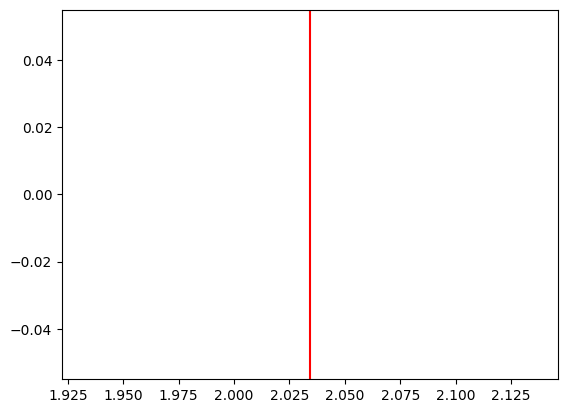

In [1136]:
C = delta / np.sqrt(2 * np.pi) * np.exp(delta * gamma)
plt.plot(xx, C * f)
plt.axvline(root, color='r')
# plt.xlim(-0.01, 0.01)
plt.show()

In [ ]:
from nig_integration import nig_integration

In [ ]:
def f(t):
    gamma = np.sqrt(alpha**2 - beta**2)
    integrand = special.ndtr((x-mu - beta * t)/np.sqrt(t)) * np.exp(-(delta - gamma * t)**2 / 2 / t) * t**(-3/2)
    # C = delta/ np.sqrt(2 * np.pi)

    return integrand

In [ ]:
N

In [ ]:
nig_integration(f, N, 1e-15, max_steps=10)

In [ ]:
float(quad_phi(x, alpha, beta, mu, delta, a=mp.zero, b=N, digits=100))

In [ ]:
eps = 1e-15
h = 0.5
z = -(eps ** 2) / h / 2
np.log(-2 / np.pi * special.lambertw(z, -1).real) / h,  special.lambertw(z, -1).real

In [ ]:
a = 0.3205
np.log(-z) - 2 / a * (1 - 1 / (1 + a * sqrt(-0.5*(1 + np.log(-z)))))

In [ ]:
u = -2 * np.log(eps) + np.log(2 * h) - 1
special.lambertw(-np.exp(-u-1), -1), -1 - np.sqrt(2 * u) - 2/3*u

In [ ]:
np.pi / 2